In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [3]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }


# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]


# Training Set Histograms / Scatter Plots for Viz

In [4]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
trainXY = pd.read_pickle(rdrive + 'nuc32_activities_scaled_1g_reindex.pkl')

In [5]:
trainXY.sample(2)

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,AvgPowerDensity,ModDensity,UiWeight,ac227,am241,...,pu239,pu240,ra226,sb125,th228,th229,u232,u233,u234,u235
202136,bwr,0.944914,2.91,16393.62,atrium10x10-9,10.0,0.3,1,1.210000e-12,0.000149,...,0.000274,0.000198,6.851000e-14,0.003658,1.578000e-09,6.987000e-14,5.218000e-09,1.871000e-11,0.000002,3.313000e-08
195184,bwr,815.875520,1.89,6277.55,atrium10x10-9,10.0,0.7,1,4.959000e-13,0.000069,...,0.000162,0.000098,6.119000e-14,0.000976,3.176000e-10,6.672000e-15,6.111000e-10,8.805000e-12,0.000002,2.815000e-08


In [6]:
rxtr_name = 'Reactor Type'
trainXY[rxtr_name] = trainXY['ReactorType']

enr_name = 'Enrichment [% U235]'
trainXY[enr_name] = trainXY['Enrichment']

burn_name = 'Burnup [GWd/MTU]'
trainXY[burn_name] = trainXY['Burnup']/1000.0

cool_name = 'Cooling Time [days]'
trainXY[cool_name] = trainXY['CoolingTime']

/home/opotowsky/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 432x288 with 0 Axes>

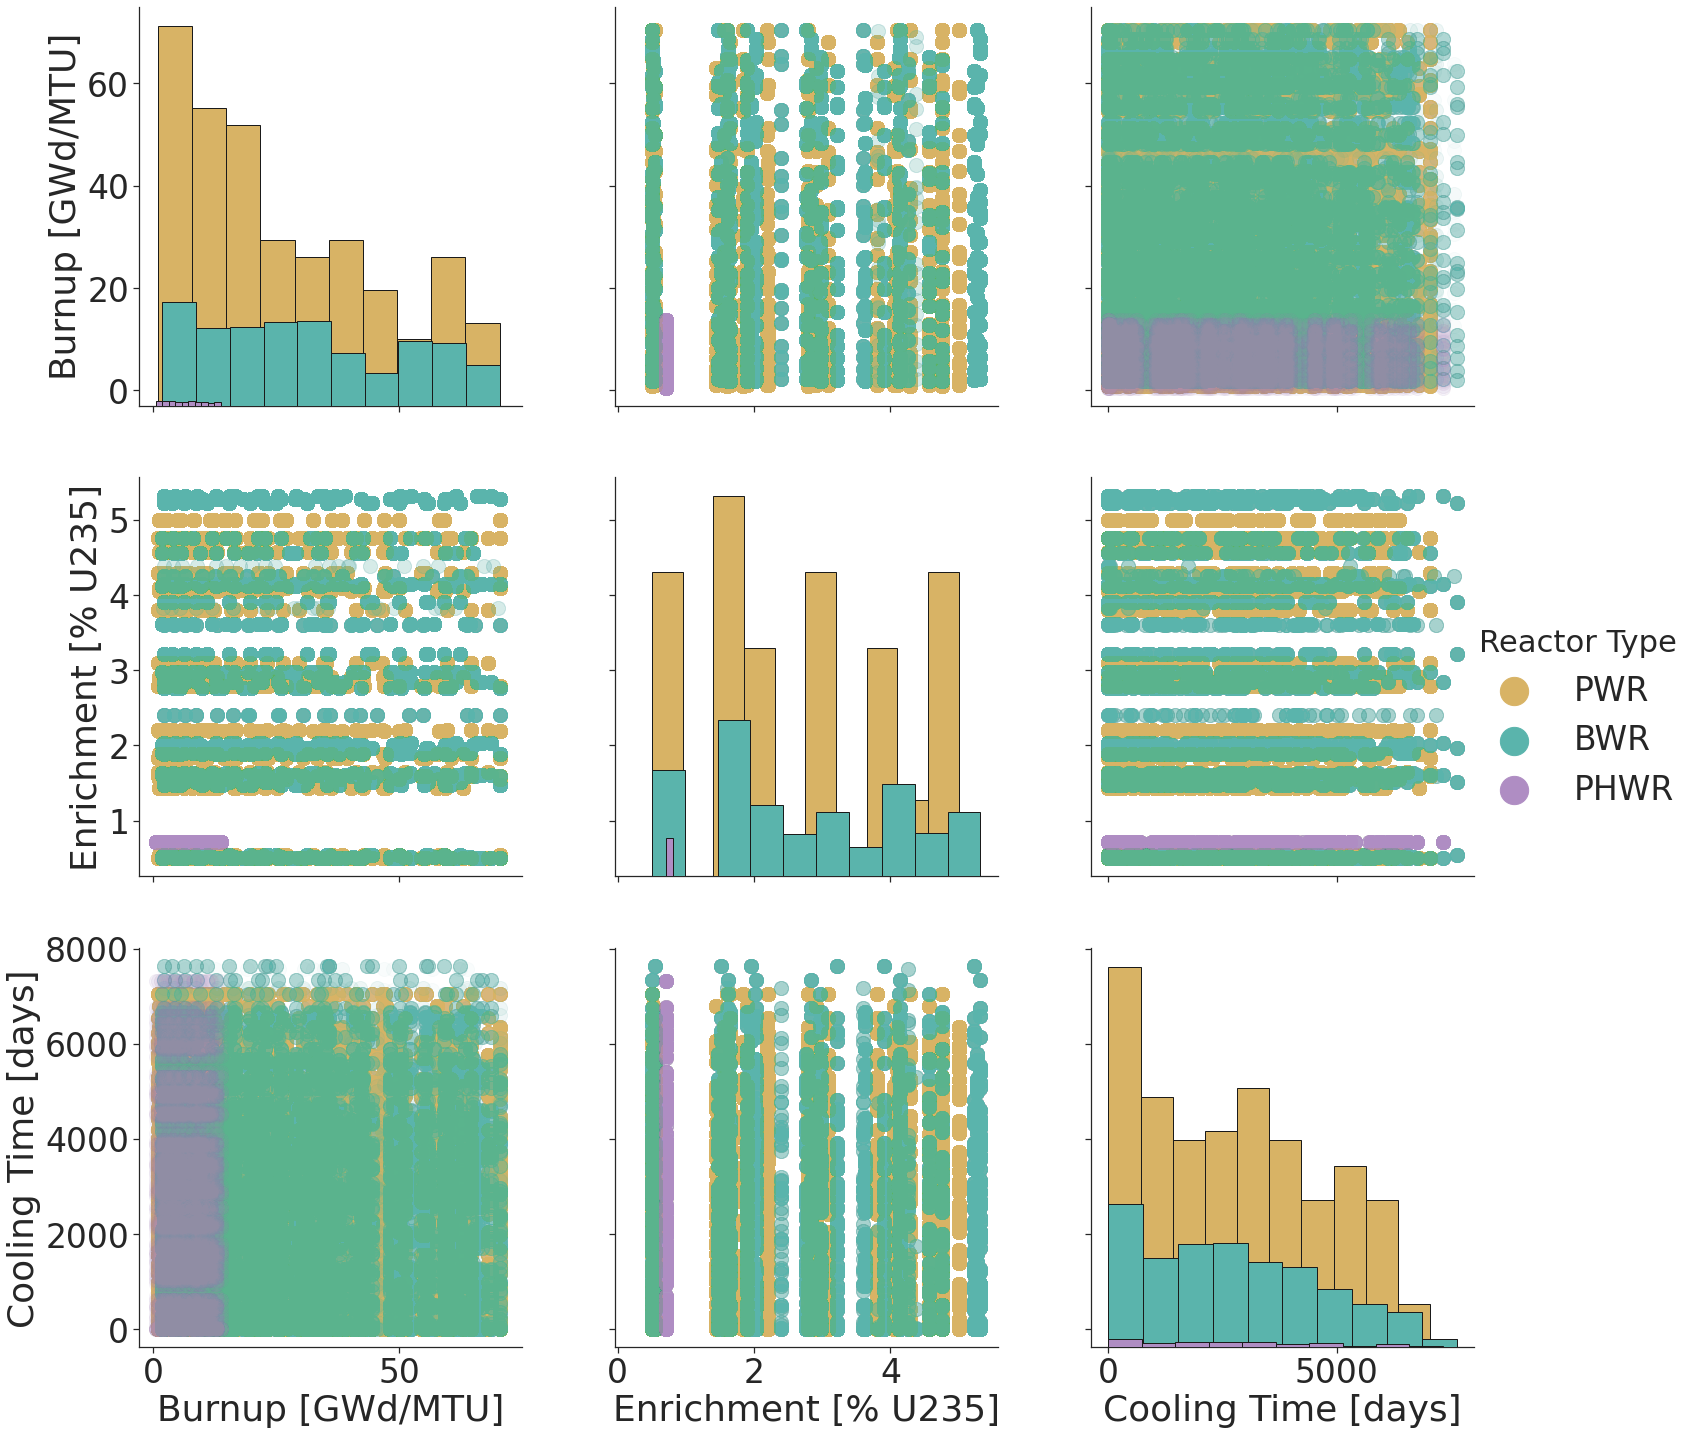

In [7]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name, cool_name]]
g = sns.set(style="ticks", font_scale=3)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=200, alpha=0.03)#g.map_offdiag(plt.scatter, s=100, alpha=0.06)
g.axes[0,0].set_ylim(-3, 75)
g.axes[2,0].set_xlim(-3, 75)
#g.axes[0,0].set_ylim(-3, 65)
#g.axes[1,0].set_xlim(-3, 65)
#g.axes[2,0].set_ylim(-200, 6000)
#g.axes[2,2].set_xlim(-200, 6000)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
for lh in g._legend.legendHandles: lh.set_alpha(1)
    
#g.savefig('histogram_scatter_trainset_viz.png', bbox_inches='tight', transparent=True)

In [10]:
x = trainXY[burn_name]
y = trainXY[enr_name]

#bin stuff
xbin = 1500
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

ValueError: s must be a scalar, or the same size as x and y

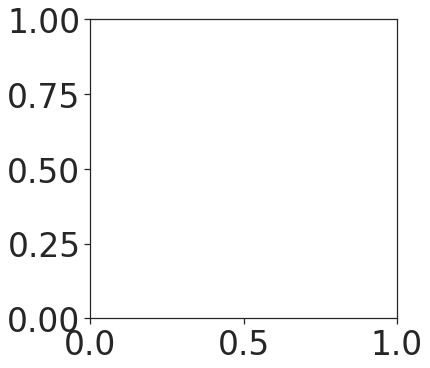

In [11]:
fig, axScatter = plt.subplots(figsize=(5.5, 5.5))
axScatter.scatter(x, y, s=ycount*0.25, alpha=0.5)
plt.show()

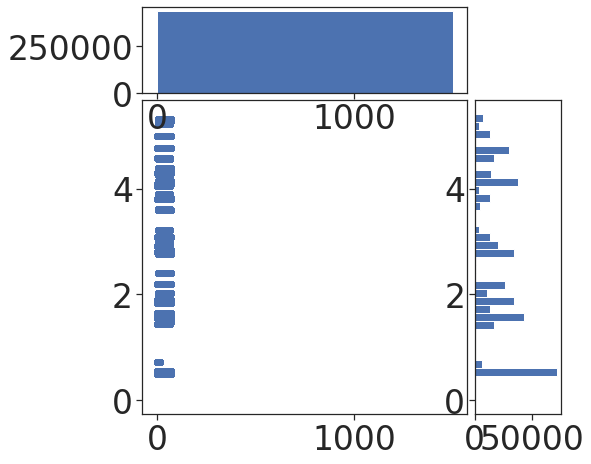

In [12]:
fig.clf()
fig, axScatter = plt.subplots(figsize=(7.5,7.5))
axScatter.scatter(x, y)
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)
axHistx.hist(x, bins=xbins)
axHisty.hist(y, bins=ybins, orientation='horizontal')
#plt.draw()
plt.show()